In [1]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
from numpy import linalg as la
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

sys.path.append('../src')
plt.rcParams.update({'figure.max_open_warning': 0})

from utils import transform as tr

<IPython.core.display.Javascript object>


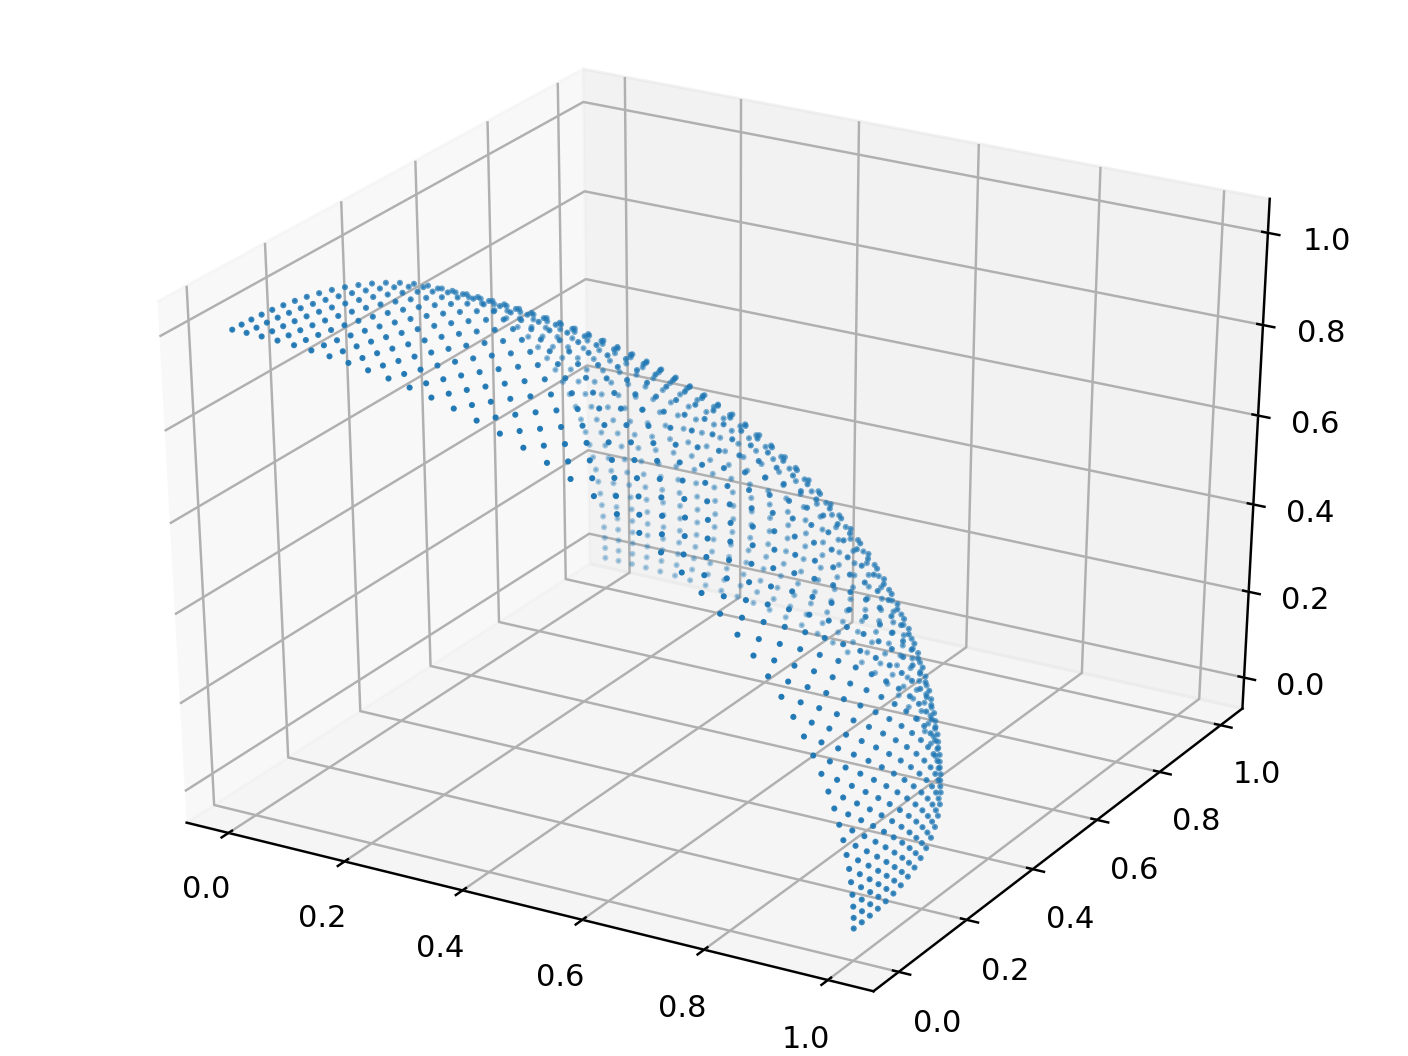

../src/utils/sampling.py:199: UserWarning: Das-Dennis's method couldn't generate 495 points.
  warnings.warn("Das-Dennis's method couldn't generate {:d} points.".format(n))
../src/utils/sampling.py:200: UserWarning: Genenrated 465 points instead.
  warnings.warn("Genenrated {:d} points instead.".format(R.shape[0]))


<IPython.core.display.Javascript object>


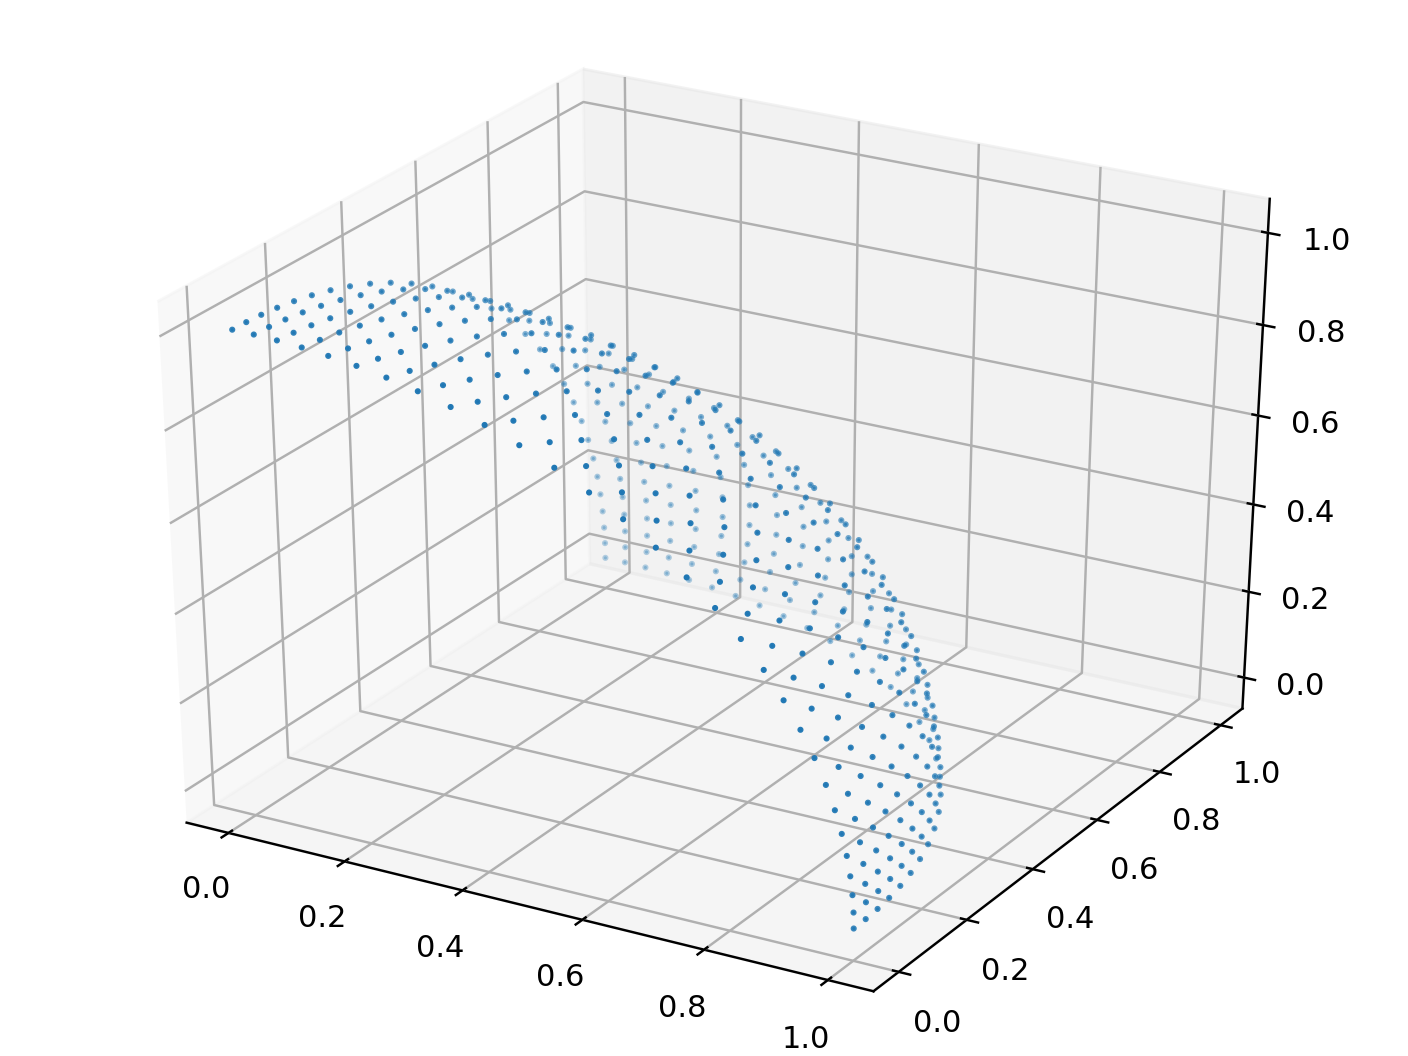

In [2]:
from generators import dtlz2

dim = '3d'
fullpathf = "../data/dtlz2-nbi/{0:s}/dataf.csv".format(dim)

path, filenamef = os.path.split(fullpathf)
dirs = path.split('/')
frontname = dirs[-2]

F1 = np.loadtxt(fullpathf, delimiter = ',')

# Plot
if dim == "2d":
    fig = plt.figure()
    ax = fig.gca()
    ax.scatter(F1[:,0], F1[:,1], s = 1)
    plt.show()
else:
    fig = plt.figure()
    ax1 = Axes3D(fig)
    ax1.scatter(F1[:,0], F1[:,1], F1[:,2], s = 1)
    plt.show()
    
F2, _ = dtlz2.surface(r = 1, n = int(F1.shape[0] / 2), m = int(dim[0]), mode = 'dd') # equidistant points

# Plot
if dim == "2d":
    fig = plt.figure()
    ax = fig.gca()
    ax.scatter(F2[:,0], F2[:,1], s = 1)
    plt.show()
else:
    fig = plt.figure()
    ax1 = Axes3D(fig)
    ax1.scatter(F2[:,0], F2[:,1], F2[:,2], s = 1)
    plt.show()

In [5]:
def get_eps_balls(X, eps = 0.125, refs = None):
    X_ = tr.normalize(X, lb = np.zeros(X.shape[1]), ub = np.ones(X.shape[1]))
    tree = spatial.cKDTree(X_)
    balls = {}
    if refs is None:
        Id = np.arange(0, X_.shape[0], 1, dtype = np.int64)
        np.random.shuffle(Id)
        idx = set(Id)
        while len(idx) > 0:
            i = np.random.choice(np.array(list(idx)))
            neighbors = tree.query_ball_point(X_[i,:], eps)
            if len(neighbors) >= X_.shape[1] + 1:
                balls[i] = neighbors
            else:
                _, neighbors = tree.query(X_[i,:], k = X_.shape[1] + 1)
                balls[i] = neighbors
            idx = idx - set(neighbors)
    else:
        rballs = refs[0]
        rX_ = tr.normalize(refs[1], lb = np.zeros(X.shape[1]), ub = np.ones(X.shape[1]))
        for k in rballs.keys():
            _, i = tree.query([rX_[k]], k = 1)
            neighbors = tree.query_ball_point(X_[i[0],:], eps)
            balls[k] = neighbors
    return balls

def get_persistence_diagrams(X, balls):
    dgms = {}
    for i in balls:
        dgm = ripser.ripser(X[balls[i],:])
        dgms[i] = dgm['dgms']
    return dgms

In [6]:
eps = 0.125
balls1 = get_eps_balls(F1, eps = eps)
print(len(balls1))
for k in list(balls1.keys())[0:10]:
    print(k, ":", balls1[k])

eps = 0.125
balls2 = get_eps_balls(F2, eps = eps, refs = (balls1, F1))
print(len(balls2))
for k in list(balls2.keys())[0:10]:
    print(k, ":", balls2[k])

73
404 : [332, 333, 436, 435, 403, 402, 367, 368, 470, 469, 437, 334, 335, 439, 369, 405, 371, 406, 404, 438, 370, 471]
210 : [44, 46, 45, 87, 88, 89, 90, 132, 133, 170, 130, 129, 171, 172, 173, 210, 211, 174, 212, 213, 214, 131, 249, 287, 252, 290, 288, 289, 250, 251, 324, 325, 326]
814 : [866, 849, 831, 832, 867, 850, 868, 813, 851, 833, 852, 814, 794, 815, 795, 835, 834, 774, 816, 796, 775, 753, 793, 812, 772, 773, 752]
946 : [976, 971, 975, 970, 962, 955, 963, 947, 956, 969, 938, 948, 957, 964, 949, 939, 928, 946, 954, 937, 927, 945, 936, 926, 915, 935, 925, 914, 913, 924, 902, 901, 916, 917, 903]
453 : [488, 422, 455, 487, 387, 486, 421, 454, 518, 517, 420, 386, 453, 485, 385, 419, 452, 418, 484, 384, 451, 516]
238 : [161, 160, 118, 159, 117, 116, 158, 156, 157, 241, 316, 279, 278, 315, 201, 240, 351, 200, 239, 198, 313, 314, 238, 312, 199, 276, 237, 275, 277, 197, 196, 236, 274, 350]
136 : [5, 48, 91, 133, 174, 214, 49, 92, 134, 175, 215, 93, 135, 176, 6, 50, 216, 7, 94, 51, 136,

73
13 6


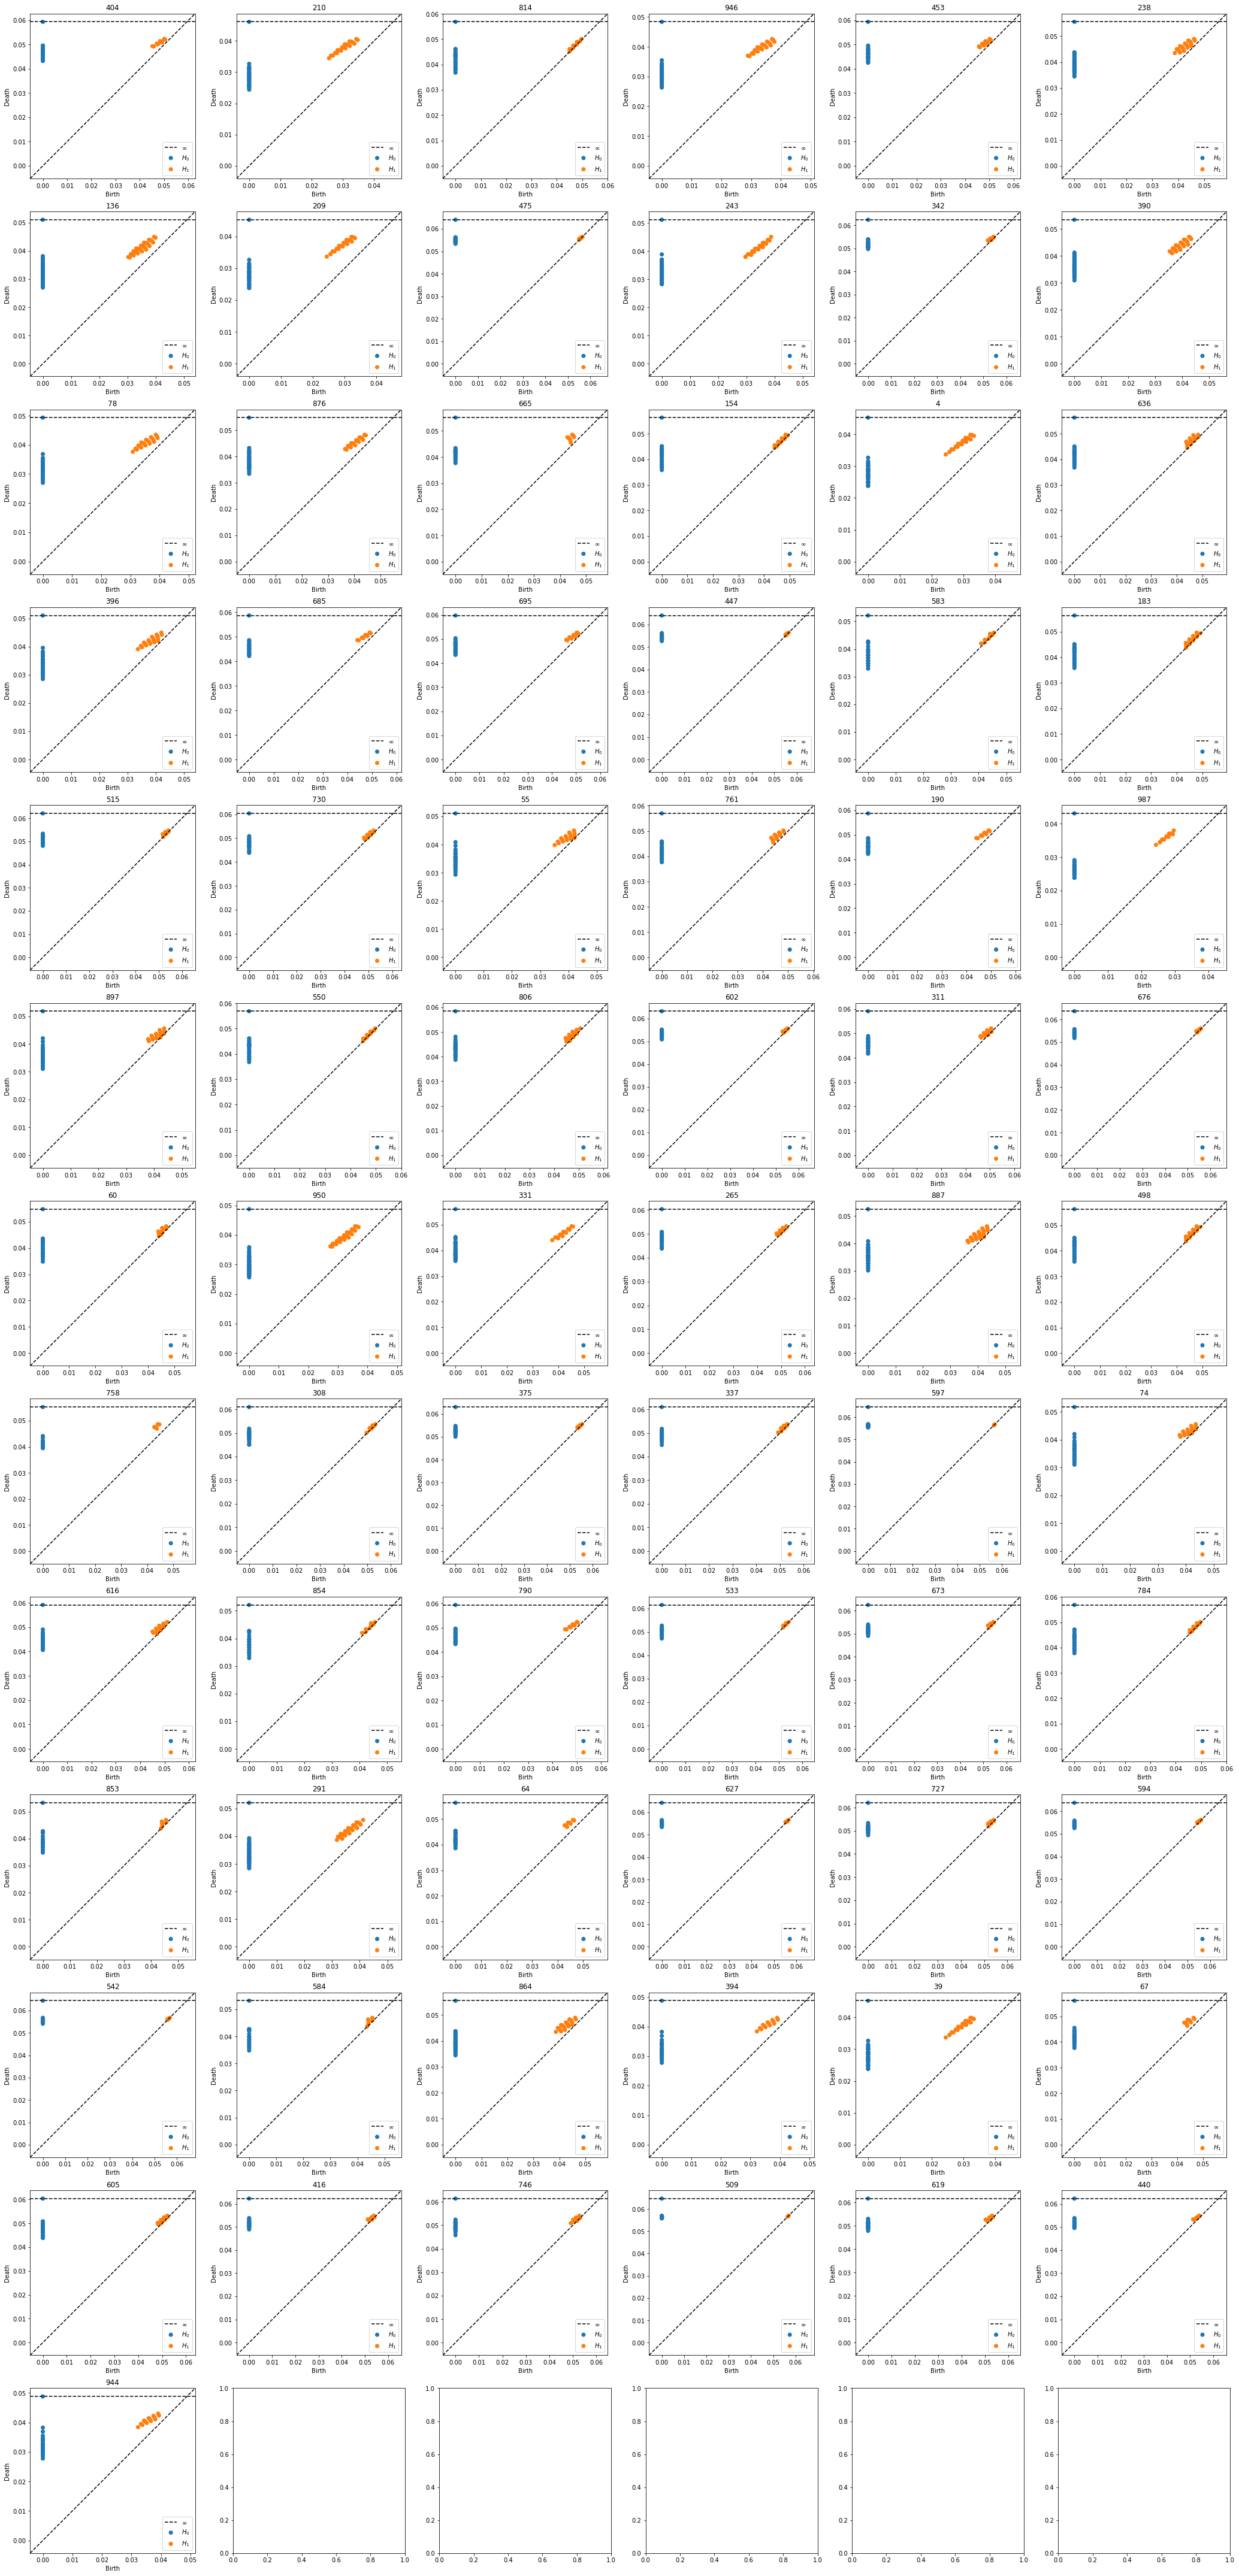

In [7]:
import ripser
from persim import plot_diagrams

%matplotlib inline
import matplotlib.pyplot as plt

dgms = get_persistence_diagrams(F1, balls1)
centers = list(dgms.keys())
print(len(centers))

c = 6
r = (len(centers) // c) if len(centers) % c == 0 else (len(centers) // c) + 1
print(r, c)
# r,c = 2,2

fig, axs = plt.subplots(r, c, figsize = (c * 6, r * 6))
i = 0
for r_ in range(r):
    for c_ in range(c):        
        # plot
        if i < len(centers):
            plot_diagrams(dgms[centers[i]], size = 50, \
                          title = "{0:d}".format(centers[i]), \
                          ax = axs[r_, c_]) #, xy_range = [-0.1, 2.5, -0.1, 2.5])
        i = i + 1

# fp = "./slide/figs/dgms{0:s}X{1:d}d{2:d}n{3:.2f}eps.pdf".format(surf.__name__, d, X.shape[0], eps)
# os.makedirs(os.path.dirname(fp), exist_ok = True)
# plt.savefig(fp, transparent = False, bbox_inches = 'tight', pad_inches = 0.1, dpi = 150)

plt.show()

73
13 6


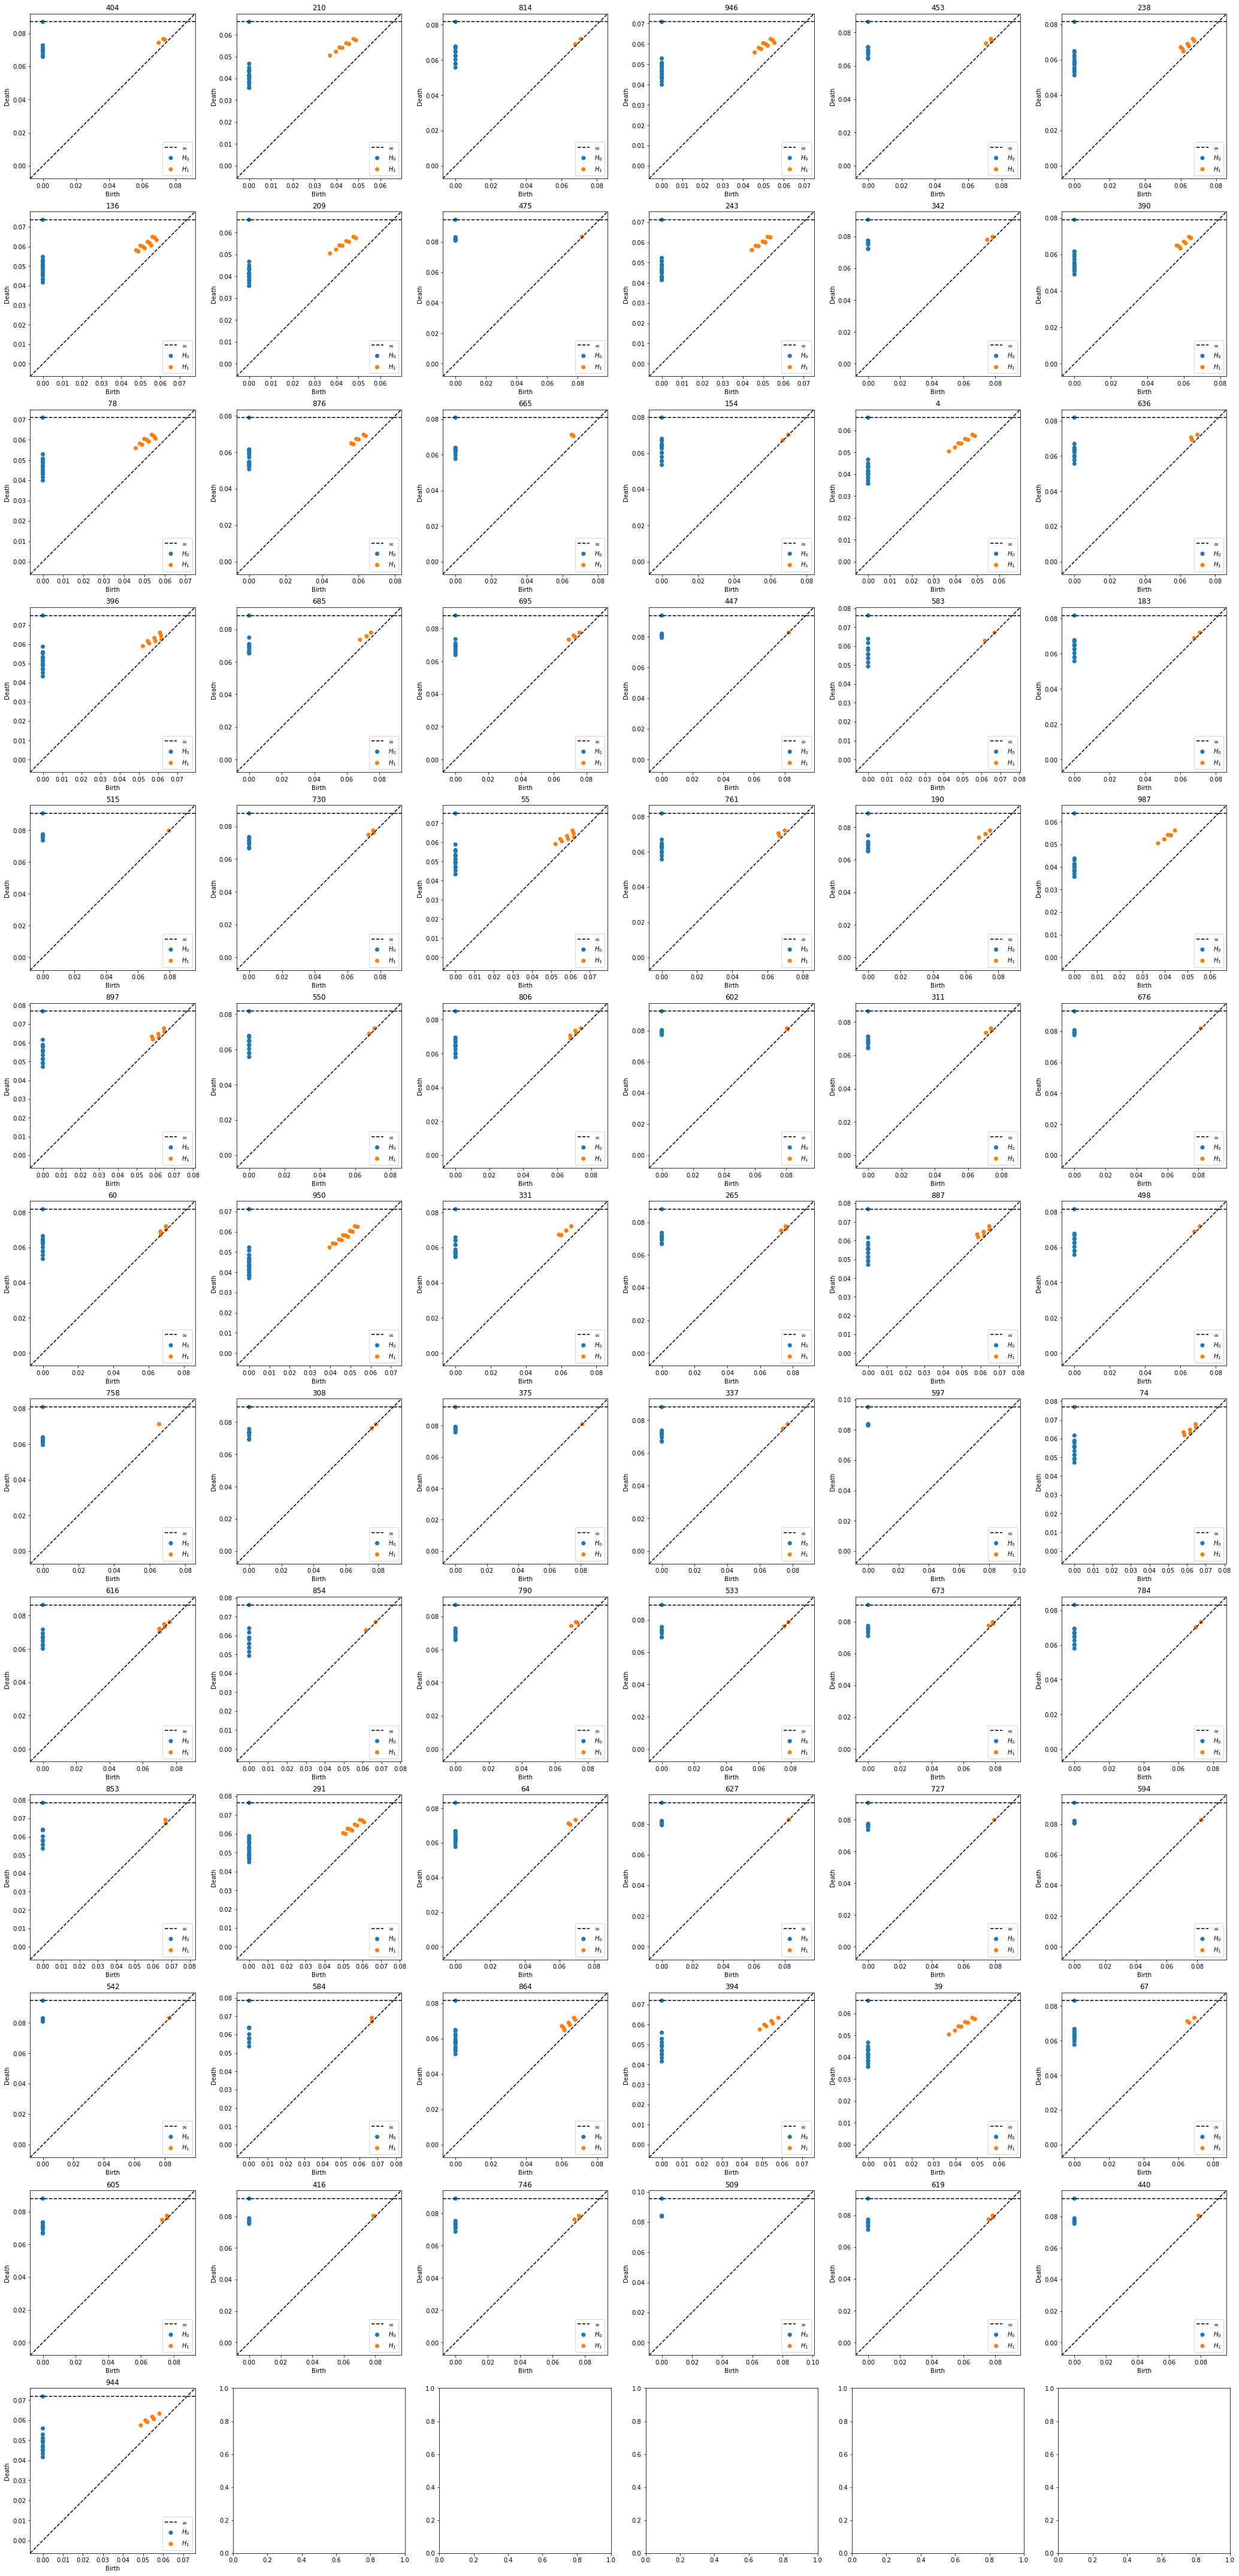

In [8]:
import ripser
from persim import plot_diagrams

%matplotlib inline
import matplotlib.pyplot as plt

dgms = get_persistence_diagrams(F2, balls2)
centers = list(dgms.keys())
print(len(centers))

c = 6
r = (len(centers) // c) if len(centers) % c == 0 else (len(centers) // c) + 1
print(r, c)
# r,c = 2,2

fig, axs = plt.subplots(r, c, figsize = (c * 6, r * 6))
i = 0
for r_ in range(r):
    for c_ in range(c):        
        # plot
        if i < len(centers):
            plot_diagrams(dgms[centers[i]], size = 50, \
                          title = "{0:d}".format(centers[i]), \
                          ax = axs[r_, c_]) #, xy_range = [-0.1, 2.5, -0.1, 2.5])
        i = i + 1

# fp = "./slide/figs/dgms{0:s}X{1:d}d{2:d}n{3:.2f}eps.pdf".format(surf.__name__, d, X.shape[0], eps)
# os.makedirs(os.path.dirname(fp), exist_ok = True)
# plt.savefig(fp, transparent = False, bbox_inches = 'tight', pad_inches = 0.1, dpi = 150)

plt.show()